In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv('./data/titanic.csv')

In [3]:
titanic_df.head()

,id,gender,age,class,embarked,country,fare,sibsp,parch,survived
0,0,male,42.0,3rd,Southampton,United States,7.11,0.0,0.0,no
1,1,male,13.0,3rd,Southampton,United States,20.05,0.0,2.0,no
2,2,male,16.0,3rd,Southampton,United States,20.05,1.0,1.0,no
3,3,female,39.0,3rd,Southampton,England,20.05,1.0,1.0,yes
4,4,female,16.0,3rd,Southampton,Norway,7.13,0.0,0.0,yes


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2207 non-null   int64  
 1   gender    2207 non-null   object 
 2   age       2205 non-null   float64
 3   class     2207 non-null   object 
 4   embarked  2207 non-null   object 
 5   country   2126 non-null   object 
 6   fare      2181 non-null   float64
 7   sibsp     2197 non-null   float64
 8   parch     2197 non-null   float64
 9   survived  2207 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 172.5+ KB


In [5]:
titanic_df.isnull().count()

id          2207
gender      2207
age         2207
class       2207
embarked    2207
country     2207
fare        2207
sibsp       2207
parch       2207
survived    2207
dtype: int64

In [6]:
titanic_df.describe()

,id,age,fare,sibsp,parch
count,2207.000000,2205.000000,2181.000000,2197.000000,2197.000000
mean,1103.000000,30.436735,19.773290,0.297223,0.229404
std,637.250343,12.159677,43.402454,0.840384,0.694232
min,0.000000,0.166667,0.000000,0.000000,0.000000
25%,551.500000,22.000000,0.000000,0.000000,0.000000
50%,1103.000000,29.000000,7.150600,0.000000,0.000000
75%,1654.500000,38.000000,20.110600,0.000000,0.000000
max,2206.000000,74.000000,512.060700,8.000000,9.000000


In [7]:
titanic_df.drop('id', axis=1, inplace=True)

In [8]:
titanic_df.head()

,gender,age,class,embarked,country,fare,sibsp,parch,survived
0,male,42.0,3rd,Southampton,United States,7.11,0.0,0.0,no
1,male,13.0,3rd,Southampton,United States,20.05,0.0,2.0,no
2,male,16.0,3rd,Southampton,United States,20.05,1.0,1.0,no
3,female,39.0,3rd,Southampton,England,20.05,1.0,1.0,yes
4,female,16.0,3rd,Southampton,Norway,7.13,0.0,0.0,yes


In [9]:
def create_crew(row):
    if len(row['class']) > 3:
        return 1
    elif len(row['class']) > 0:
        return 0
    else:
        return -1

In [10]:
titanic_df['crew'] = titanic_df.apply(lambda row: create_crew(row), axis=1)

In [11]:
titanic_df.tail()

,gender,age,class,embarked,country,fare,sibsp,parch,survived,crew
2202,male,41.0,deck crew,Belfast,England,0.0,0.0,0.0,yes,1
2203,male,40.0,victualling crew,Southampton,England,0.0,0.0,0.0,yes,1
2204,male,32.0,engineering crew,Southampton,England,0.0,0.0,0.0,no,1
2205,male,20.0,restaurant staff,Southampton,England,0.0,0.0,0.0,no,1
2206,male,26.0,restaurant staff,Southampton,England,0.0,0.0,0.0,no,1


In [12]:
pd.value_counts(titanic_df['crew'])

0    1317
1     890
Name: crew, dtype: int64

In [13]:
pd.value_counts(titanic_df['survived'])

no     1496
yes     711
Name: survived, dtype: int64

Convert survived from string to 0 or 1

In [14]:
titanic_df['survived'] = titanic_df.apply(lambda row: 0 if row['survived'] == 'no' else 1, axis=1)

In [15]:
titanic_df.head()

,gender,age,class,embarked,country,fare,sibsp,parch,survived,crew
0,male,42.0,3rd,Southampton,United States,7.11,0.0,0.0,0,0
1,male,13.0,3rd,Southampton,United States,20.05,0.0,2.0,0,0
2,male,16.0,3rd,Southampton,United States,20.05,1.0,1.0,0,0
3,female,39.0,3rd,Southampton,England,20.05,1.0,1.0,1,0
4,female,16.0,3rd,Southampton,Norway,7.13,0.0,0.0,1,0


Check survival-rate (%) for class, gender and crew attributes

In [16]:
titanic_df.groupby(['class', 'gender', 'crew'])['survived'].mean()

class             gender  crew
1st               female  0       0.965278
                  male    0       0.344444
2nd               female  0       0.886792
                  male    0       0.134831
3rd               female  0       0.490741
                  male    0       0.152130
deck crew         male    1       0.651515
engineering crew  male    1       0.219136
restaurant staff  female  1       1.000000
                  male    1       0.014925
victualling crew  female  1       0.857143
                  male    1       0.185366
Name: survived, dtype: float64

In [17]:
titanic_df.groupby(['gender', 'crew'])['survived'].mean()

gender  crew
female  0       0.727468
        1       0.869565
male    0       0.189189
        1       0.220300
Name: survived, dtype: float64

In [18]:
titanic_df[titanic_df['age'] < 18].groupby(['gender', 'class'])['survived'].mean()

gender  class           
female  1st                 0.833333
        2nd                 1.000000
        3rd                 0.482759
male    1st                 0.857143
        2nd                 0.733333
        3rd                 0.220779
        restaurant staff    0.000000
        victualling crew    0.083333
Name: survived, dtype: float64

In [19]:
titanic_df[titanic_df['age'] < 18].shape

(200, 10)

In [20]:
titanic_df['crew_role'] = titanic_df.apply(lambda row: row['class'] if len(row['class']) > 3 else '', axis=1)

In [21]:
pd.value_counts(titanic_df['crew_role'])

                    1317
victualling crew     431
engineering crew     324
restaurant staff      69
deck crew             66
Name: crew_role, dtype: int64

In [22]:
def fix_class(row):
    match row['class']:
        case '1st':
            return 1
        case '2nd':
            return 2
        case '3rd':
            return 3
        case _:
            return 0

In [23]:
titanic_df['class'] = titanic_df.apply(lambda row: fix_class(row), axis=1)

In [24]:
import seaborn as sns

<AxesSubplot:>

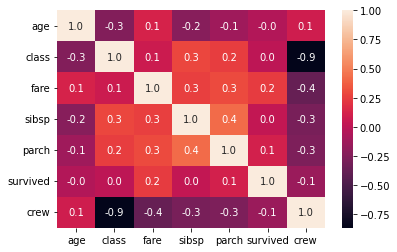

In [25]:
sns.heatmap(titanic_df.corr(), annot=True, fmt='.1f')

In [29]:
import matplotlib as plt

<AxesSubplot:>

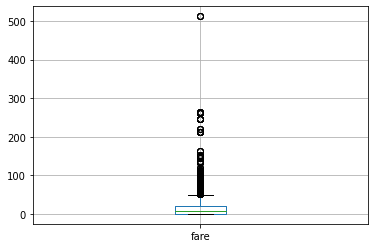

In [32]:
titanic_df.boxplot(column='fare')

In [34]:
titanic_df[titanic_df['fare'] > 500]

,gender,age,class,embarked,country,fare,sibsp,parch,survived,crew,crew_role
197,female,58.0,1,Cherbourg,United States,512.0607,0.0,1.0,1,0,
198,male,36.0,1,Cherbourg,United States,512.0607,0.0,1.0,1,0,
714,male,35.0,1,Cherbourg,NaN,512.0607,0.0,0.0,1,0,
1248,female,37.0,1,Cherbourg,NaN,512.0607,0.0,0.0,1,0,


In [35]:
df_cat = titanic_df[['survived', 'class', 'gender', 'embarked', 'crew']]

In [36]:
df_cat.head()

,survived,class,gender,embarked,crew
0,0,3,male,Southampton,0
1,0,3,male,Southampton,0
2,0,3,male,Southampton,0
3,1,3,female,Southampton,0
4,1,3,female,Southampton,0


AttributeError: module 'matplotlib' has no attribute 'show'

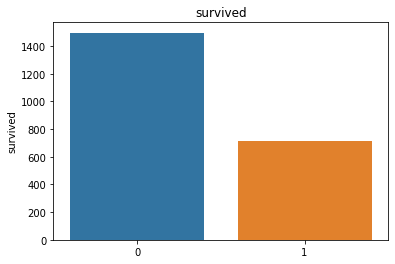

In [38]:
for col in df_cat.columns:
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts()).set_title(col)
    plt.show()